In [1]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length=1024            ## take 1024 no. of rows in the training data
train_data=torch.zeros((train_data_length,2))          ## make the training dataset as 2 dimensional by taking no. of columns as 2
train_data[:, 0]=2*math.pi*torch.rand(train_data_length)        ## make the no. as the random dataset
train_data[:, 1]=torch.sin(train_data[:, 0])
train_labels=torch.zeros(train_data_length)               ## create the train labels as zeros for all rows
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)       ## iterate it for the entire train data i.e for all the rows and the columns
]

In [4]:
train_labels

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [5]:
train_data

tensor([[ 4.4960, -0.9767],
        [ 5.7428, -0.5145],
        [ 1.7710,  0.9800],
        ...,
        [ 4.4772, -0.9725],
        [ 3.2305, -0.0887],
        [ 4.0663, -0.7984]])

In [6]:
train_set=[
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [7]:
train_set

[(tensor([ 4.4960, -0.9767]), tensor(0.)),
 (tensor([ 5.7428, -0.5145]), tensor(0.)),
 (tensor([1.7710, 0.9800]), tensor(0.)),
 (tensor([1.6217, 0.9987]), tensor(0.)),
 (tensor([ 3.9654, -0.7337]), tensor(0.)),
 (tensor([ 3.7702, -0.5881]), tensor(0.)),
 (tensor([ 5.8509, -0.4190]), tensor(0.)),
 (tensor([1.3527, 0.9763]), tensor(0.)),
 (tensor([ 3.7905, -0.6043]), tensor(0.)),
 (tensor([ 4.6042, -0.9942]), tensor(0.)),
 (tensor([1.1669, 0.9195]), tensor(0.)),
 (tensor([ 3.2048, -0.0632]), tensor(0.)),
 (tensor([ 4.7404, -0.9996]), tensor(0.)),
 (tensor([1.8120, 0.9710]), tensor(0.)),
 (tensor([ 3.6283, -0.4678]), tensor(0.)),
 (tensor([0.2252, 0.2233]), tensor(0.)),
 (tensor([0.6448, 0.6011]), tensor(0.)),
 (tensor([2.1483, 0.8378]), tensor(0.)),
 (tensor([2.7645, 0.3682]), tensor(0.)),
 (tensor([ 3.9842, -0.7464]), tensor(0.)),
 (tensor([ 3.9106, -0.6954]), tensor(0.)),
 (tensor([ 3.9801, -0.7436]), tensor(0.)),
 (tensor([ 5.3908, -0.7786]), tensor(0.)),
 (tensor([0.9877, 0.8348]), t

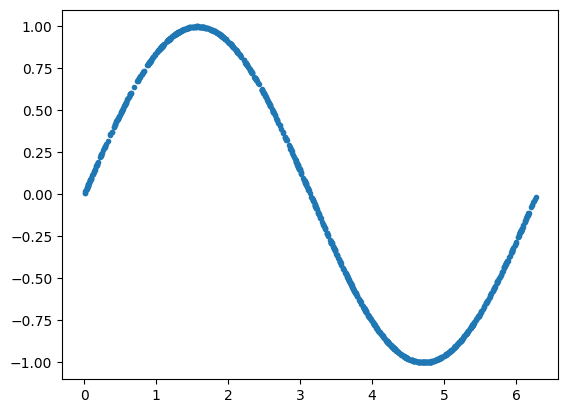

In [8]:
plt.plot(train_data[:, 0],train_data[:, 1],".")         ##plot the graph and it would be a sinusoidal wave i.e of the sine function

In [9]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(                                           ## make the batch size as 32 and in one epoch pass 32 datasets as in one batch
    train_set, batch_size=batch_size, shuffle=True
)

In [10]:
train_loader

In [11]:
class Discriminator(nn.Module):                      ##create the neural network for the discriminator side
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 556),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(556, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [12]:
discriminator=Discriminator()

In [13]:
class Generator(nn.Module):                           ## Create the neural network for the generator side
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [14]:
lr=0.001                                ##Take the learning rate as 0.001 and number of epochs as 300 to train the discriminator and take the binary cross entropy as the loss function
num_epochs=300
loss_function = nn.BCELoss()

In [15]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)         ##set the optimizer function for the generator and discriminator both side
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [16]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))                    ## this is the random data which is used for the training of disciminator and its dimension is 2 so that it can gives the result in the form of binary as 0 and 1 to test the fake and real data
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))             ## concatenate both real samples and generated sampls to train the discriminator so, that it can differentiate both real and fake data
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))           ##data which is used as the input for the generator

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")              ## find the loss for the discriminator and generator both and then do the backward propagation and optimize it.
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.15178251266479492
Epoch: 0 Loss G.: 3.036923885345459
Epoch: 10 Loss D.: 0.4404121935367584
Epoch: 10 Loss G.: 1.2318356037139893
Epoch: 20 Loss D.: 0.5823153853416443
Epoch: 20 Loss G.: 0.9824680089950562
Epoch: 30 Loss D.: 0.6563252806663513
Epoch: 30 Loss G.: 0.7511157989501953
Epoch: 40 Loss D.: 0.6331542730331421
Epoch: 40 Loss G.: 0.8225626945495605
Epoch: 50 Loss D.: 0.7053050398826599
Epoch: 50 Loss G.: 0.8805814981460571
Epoch: 60 Loss D.: 0.6742737889289856
Epoch: 60 Loss G.: 0.8396088480949402
Epoch: 70 Loss D.: 0.6803253889083862
Epoch: 70 Loss G.: 0.7085091471672058
Epoch: 80 Loss D.: 0.7080704569816589
Epoch: 80 Loss G.: 0.6826685070991516
Epoch: 90 Loss D.: 0.6861255168914795
Epoch: 90 Loss G.: 0.6990652084350586
Epoch: 100 Loss D.: 0.6892701983451843
Epoch: 100 Loss G.: 0.7448517084121704
Epoch: 110 Loss D.: 0.6950098872184753
Epoch: 110 Loss G.: 0.6749469041824341
Epoch: 120 Loss D.: 0.7067044377326965
Epoch: 120 Loss G.: 0.7058557868003845
Epoch: 1

In [17]:
latent_space_samples = torch.randn(500, 2)                  ##generate the random data of no. of rows as 500 and take it as 2 Dimensional i.e no. of columns as 2
generated_samples = generator(latent_space_samples)

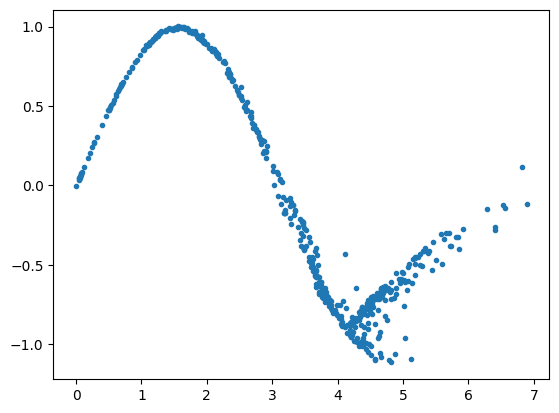

In [18]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

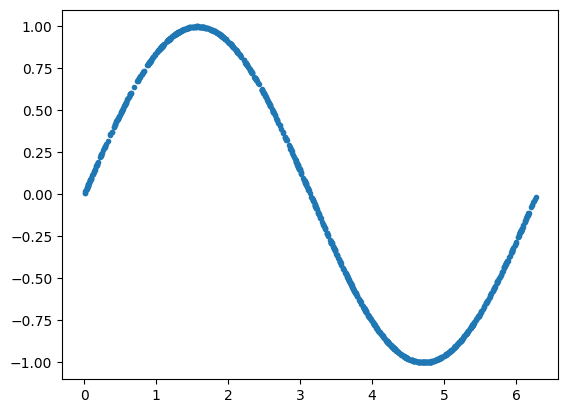

In [19]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")